In [2]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis")

from artifical_data import reaction1_synthetic_data
from monte_carlo_estimator import monte_carlo_parameter_estimation
from plotter import print_monte_carlo_info, corner_plot_monte_carlo_results, correlation_matrix_plot
from data_handler import save_results
from noise_function_libary import no_noise, add_noise_plate_reader, add_noise_processed_data,add_noise_rate
import os
import pandas as pd

In [3]:
# experimental data
EXPERIMENTAL_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\experimental_data"

# processed data
PROCESSED_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\processed_data"

# results path
RESULTS_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\results"

In [4]:
 # define model
    
parameters = ['Vmax', 'Km1', 'Km2']
substrates = ["HP_mM"]

def michaelis_menten_inhibition_HP(S, *parameters):
    S1 = S
    Vmax, Km1, Km2 = parameters

    return (Vmax * S1 * 0.6) / ((Km1 + S1) * (Km2 + 0.6))

In [10]:
 # Perform Monte Carlo parameter estimation with experimental data

data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "Reaction2", "r_2_HP_NADH_PD.csv"))
cal_data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "NADH_Kalibriergerade.csv"))

cal_parameters = {
    "Vf_well": 10.0,  # mL
    "Vf_prod": 5.0,  # mL
    "c_prod": 2.15    # mg/mL
}

initial_guess = [2.6,111,3]
noise_level = 0.05
num_iterations = 500

In [11]:
mc_reaction2_noisy_plate_reader = monte_carlo_parameter_estimation(data, 
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition_HP, add_noise_plate_reader, 
                                                            initial_guess, noise_level, num_iterations)


df_reaction2_noisy_plate_reader = save_results(mc_reaction2_noisy_plate_reader, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction2_HP_noisy_plate_reader_results.csv"))

Monte Carlo Parameter Estimation Results:
Vmax: 3.326121906287273 ± 0.4076620432923855
Km1: 106.58198053602462 ± 73.51563925303866
Km2: 3.232509698988364 ± 0.5389030432680826

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2']
 ['Vmax' 1.0 0.6313137335195137 0.016830642070336688]
 ['Km1' 0.6313137335195137 1.0 -0.6853419101473847]
 ['Km2' 0.016830642070336688 -0.6853419101473847 1.0]]


C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


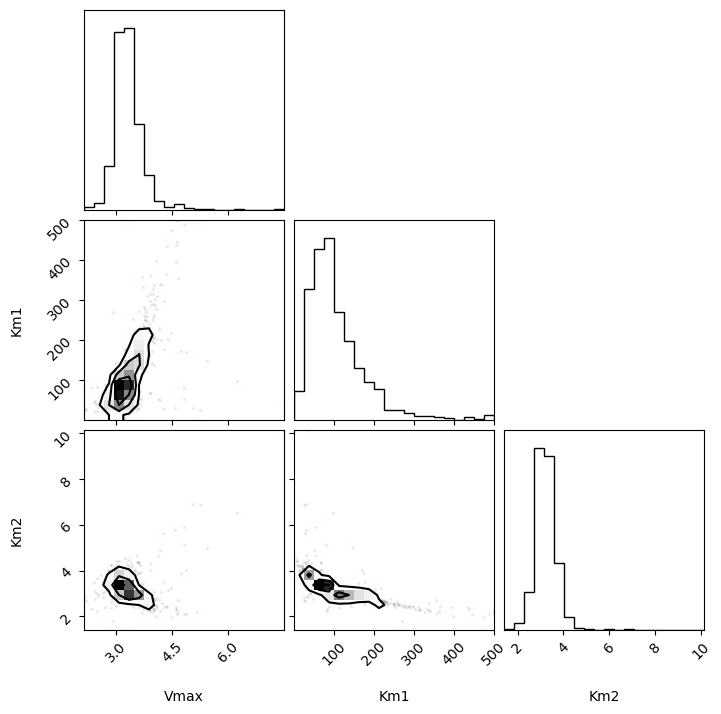

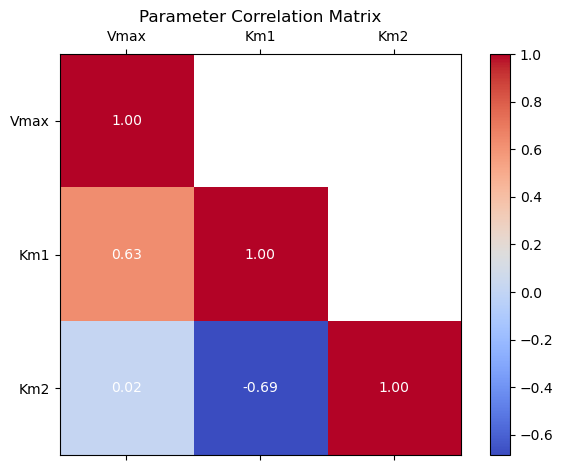

In [12]:
print_monte_carlo_info(parameters, df_reaction2_noisy_plate_reader)
corner_plot_monte_carlo_results(df_reaction2_noisy_plate_reader,parameters)
correlation_matrix_plot(df_reaction2_noisy_plate_reader,parameters)

In [13]:
# Perform Monte Carlo parameter estimation with experimental data
mc_reaction1_noisy_rates = monte_carlo_parameter_estimation(data,
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition_HP, add_noise_rate,
                                                            initial_guess, noise_level, num_iterations)


df_reaction1_noisy_rates = save_results(mc_reaction1_noisy_rates, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction1_noisy_plate_reader_results.csv"))

C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


Monte Carlo Parameter Estimation Results:
Vmax: 3.4807015939601884 ± 4.969907652988867
Km1: 107.73125866986142 ± 55.98296016139297
Km2: 3.366775566546006 ± 5.6826497952133606

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2']
 ['Vmax' 1.0 0.034851156897368306 0.9946806773206931]
 ['Km1' 0.034851156897368306 1.0 -0.06022405517842851]
 ['Km2' 0.9946806773206931 -0.06022405517842851 1.0]]


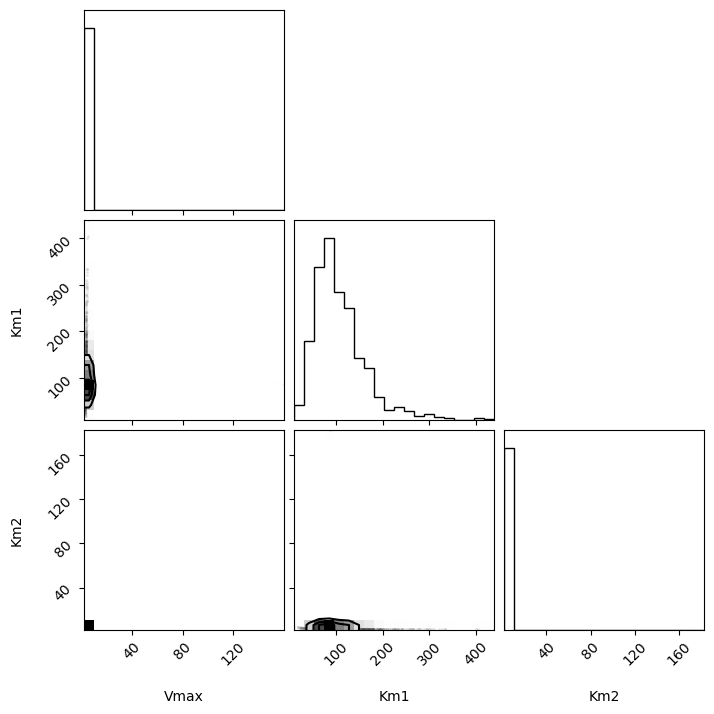

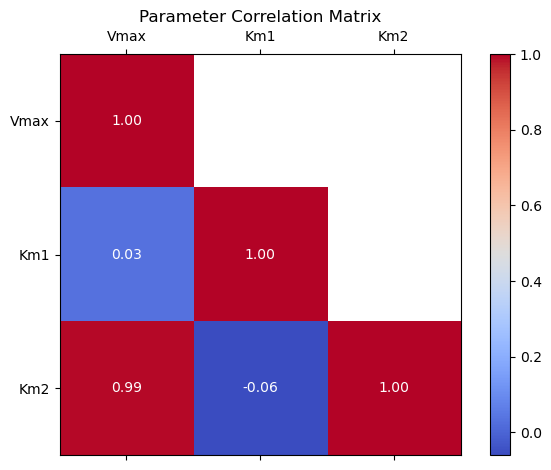

In [14]:
print_monte_carlo_info(parameters, df_reaction1_noisy_rates)
corner_plot_monte_carlo_results(df_reaction1_noisy_rates,parameters)
correlation_matrix_plot(df_reaction1_noisy_rates,parameters)